# CSIT5210 Assignment

## Fall 2019

### Instructor: Dr. Kenneth Leung (kwtleung@cse.ust.hk)

### TA: Dr. Kevin Wang (kevinw@ust.hk)


---

## [Group Signup link](https://docs.google.com/spreadsheets/d/1pD-LTpKU51jMQ9DymGbQsSfMNJ8JcjGO02sQaXBJzdU/edit#gid=0)

## Description

In this assignment, you will have an opportunity to apply some data mining techniques that you learned in the class to a problem.

To get started on this assignment, you need to download the given dataset and read the description carefully written on this page. Please note that all implementation of your program should be done with Python.

You are required to form a team with at most 4 students. You and your groupmates should evenly divide the project tasks yourself. All team members are going to graded with the same score.

There are two parts in this assignment. Part 1 is a programming exercise that your groups are required to complete certain tasks using Python. You should complete your Part 1 in this jupyter notebook (.ipynb file) directly. Part 2 is a group presentation that you need to present your findings on the Task 5 of Part 1.

## Submission

| Part | Due Date | Submission by | Files to Submit |
|---|-----|------|----|
| Part 1 | 15/11/2019 (Fri) 23:59 | [email to TA](mailto:kevinw@ust.hk) | this `ipynb` file. |
| Part 2 | 21/11/2019 (Thu) during lecture | Printed hardcopy | Presentation slides (4 slides per page) |

## Prerequesite

You are recommended to install the following packages

* pandas
* geohash
* matplotlib
* sklearn

To install these packages, you shall type in your terminal

```
> pip install pandas
> pip install geohash
> pip install matplotlib
> pip install sklearn
```

The package geohash is a little tricky to install.

## About the data and the context

We are working on some data related to Taxi. In Task 1 to 4 we use the data set `taxi_train.csv`. In Task 5 we use another set of data. 
You can [download the data here](./tostudent.zip)


### Taxi Data

The data contains the following: 

In [3]:
import pandas as pd
taxi = pd.read_csv('./data/taxi_train.csv', sep=',', nrows= 10)
taxi.head(10)

pickup_datetime  passenger pickup_geohash dropoff_geohash  fare
0  2009-06-15 17:26:21          1   dr5rxth4yu4c    dr5rxeqnjy8v   4.5
1  2010-01-05 16:52:16          1   dr5reer0t0fm    dr72h81uqhe9  16.9
2  2011-08-18 00:35:00          2   dr5rukr7t72n    dr5ru63jpp74   5.7
3  2012-04-21 04:30:42          1   dr5rsrhpybjq    dr5ru7bcpe0c   7.7
4  2010-03-09 07:51:00          1   dr5ruvd4f7wb    dr72j06qth30   5.3
5  2011-01-06 09:50:45          1   dr5rsnfnuw1v    dr5ruey9ftmf  12.1
6  2012-11-20 20:35:00          1   dr5rud97th2k    dr5rutjbmmr6   7.5
7  2012-01-04 17:22:00          1   dr5rvnwq9f4p    dr5ru6d01cfq  16.5
8  2012-12-03 13:10:00          1   dr5reyn4k3w6    dr5rsnzyumf1   9.0
9  2009-09-02 01:11:00          2   dr5rsx2uj8r1    dr5ru7c125sg   8.9

* `pickup_datetime` is the starting time for the ride.
* `passenger` means the number of passenger.
* `pickup_geohash` and `dropoff_geohash` are the position where the passenger is picked up and dropped off respectively. They are encoded using geohash.
* `fare` is the total amount of paid in the trip.

To decode a geoash you might want to use a geohash package (follow hint on Task 1.2 to install it) and it gives you the longitude and latitude of the position. We all know that earth is a sphere (oh please), but for simplicity, when we calculate the distance between two points, we would use Euclidean distance.

In [4]:
import geohash as gh
gh.decode('dr5rxth4yu4c')

('40.721319', '-73.844311')

## Part 1 - Programming Task

Your team are required to complete the following tasks on this Jupyter notebook. 

1. Data Preprocessing & Statistics
2. Data Clustering 
3. Simple Data Visualization 
4. Frequent Pattern Mining 
5. Prediction 


In [5]:
# Task 1 - Data Preprocessing and Statistics
#
#
# Task 1.1 Read Taxi Data in using the API Pandas.read_csv so that the column 'pickup_datetime' is read as datetime64.
#                 Hint: use the parameter parse_dates
#                  ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#                 To make sure your code works you might want to read only the first 1000 rows and expand it later
import pandas as pd
taxi_data = pd.read_csv('./data/taxi_train.csv',parse_dates=['pickup_datetime'])


# Task 1.2 Convert the field pickup_geohashed and dropoff_geohashed into x-y coordinate using the API Geohash.decode
#                  The package Geohash can be found from pip. You might encounter the problem 
#                   'python3.5.2 can't find the module '  ref: https://github.com/vinsci/geohash/issues/4
#                    This can be fixed very easily. Or
#                   You might directly use the fixed version of Geohash in our project package.
#                   The precision of each coordinate is with 6 decimal places
import geohash as gh
pickup_xy = taxi_data['pickup_geohash'].apply(gh.decode)
dropoff_xy = taxi_data['dropoff_geohash'].apply(gh.decode)


# Task 1.2.1 Create unpack the decoded pickup_geohashed and dropoff_geohashed into the pair of columns 
#                  pickup_x pickup_y  and dropoff_x, dropoff_y respectively. 
#                  Namely: if pickup is [40.712278, -73.84161]; pickup_x should contain 40.712278 and pickup_y should contain -73.84161
def get_x(t):
    return t[0]

def get_y(t):
    return t[1]

# pickup coordinate
taxi_data['pickup_x'] = pickup_xy.apply(get_x).apply(float)
taxi_data['pickup_y'] = pickup_xy.apply(get_y).apply(float)

# dropoff coordinate
taxi_data['dropoff_x'] = dropoff_xy.apply(get_x).apply(float)
taxi_data['dropoff_y'] = dropoff_xy.apply(get_y).apply(float)


# Task 1.3 Create the column 'distance' based on the Euclidean distance that the ride has traveled.
import numpy as np
def get_distance(t): #Euclidean Distance
    dx = t.loc['pickup_x'] - t.loc['dropoff_x']
    dy = t.loc['pickup_y'] - t.loc['dropoff_y']
    return np.sqrt(dx*dx+dy*dy)
taxi_data['distance'] = taxi_data.apply(get_distance,axis=1)


# Task 1.4.1  Check the memory you have spent by the API .info()
taxi_data.info() #3.1+ MB
# Task 1.4.2  Fetch the first 10 lines of your data to preview it.
taxi_data.head(10)


# Task 1.5 Remove rows with invalid geohashed. Count the number of rows removed.
num1 = taxi_data.shape[0]
taxi_data = taxi_data[taxi_data['distance']!=0]
num2 = taxi_data.shape[0]
num_remove = num1-num2  #the number of rows removed
print('\nthe number of rows removed: %d' % (num_remove))


# Task 1.6  Display the count, mean, standard derviation of the int type variable and 
#                  display the earliest and latest pickup_time.
data_type = taxi_data.dtypes
intlist = data_type[data_type=='int'].index.tolist()
print('Display the Count:')
print(taxi_data[intlist[0]].value_counts()) #display the count
print('Display the Mean:')
print(np.mean(taxi_data[intlist[0]]))   #display the mean
print('Display the Standard Derviation:')
print(np.std(taxi_data[intlist[0]]))    #display the std

print('\nThe earliest pickup_time:', str(min(taxi_data['pickup_datetime']))) #display the earliest pickup_time
print('The latest pickup_time:',str(max(taxi_data['pickup_datetime'])))      #display the latest pickup_time


# Task 1.7 Find the number of order between (8am to 9am)   and the order between (1am to 2am)
#                 Note: Instead of using only the first 1000 rows, expand your selection of rows to collect enough data.
#                Hint: try the API between_time of DataFrame. 
#           ref:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.between_time.html#pandas.DataFrame.between_time
ptime = taxi_data.loc[:,('pickup_datetime','passenger')].set_index('pickup_datetime') #set time as index
num_order = ptime.between_time('08:00','09:00').shape[0] + ptime.between_time('13:00','14:00').shape[0]
print('the number of order between (8am to 9am) and the order between (1am to 2am):', num_order)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
pickup_datetime    40000 non-null datetime64[ns]
passenger          40000 non-null int64
pickup_geohash     40000 non-null object
dropoff_geohash    40000 non-null object
fare               40000 non-null float64
pickup_x           40000 non-null float64
pickup_y           40000 non-null float64
dropoff_x          40000 non-null float64
dropoff_y          40000 non-null float64
distance           40000 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 3.1+ MB

the number of rows removed: 1138
Display the Count:
1    27025
2     5783
5     2661
3     1687
4      803
6      766
0      137
Name: passenger, dtype: int64
Display the Mean:
1.666538006278627
Display the Standard Derviation:
1.2868585752227317

The earliest pickup_time: 2009-01-01 01:31:49
The latest pickup_time: 2015-06-30 22:42:39
the number of order between (8am to 9am) and the

In [6]:
# Task 2 - Data Clustering 
#
#
# Task 2.1 Create a DataFrame that contains two columns. The first column (the index) is a time series 0:00, 0:15, 0:30, 0:45, 
#                  1:00,... 23:00, 23:15, 23:30, 23:45
#                  The second column is an integer that counts the number of ride between in the interval. For example, 0:00 should contains all order happens on or after 0:00 to 0:15.
#  This task is less straight forward, at least in our solution. So let's break down a little bit.
#  Task 2.1.1 Create a list of string containing the series '0:00', '0:15', '0:30', ... '23:45' 
#                     Hint: A double loop with if-else can do the job.
tlist = [] #time period list
for i in range(24):
    for j in ['00','15','30','45']:
        tstr = str(i)+':'+j
        tlist.append(tstr)
len_tl = len(tlist)


# Task 2.1.2 Count the number of orders. You might use between_time again.
norder = np.zeros(len_tl).astype(int) #store the number of orders in time period
for i in range(len_tl):
    norder[i] = ptime.between_time( tlist[i%len_tl],tlist[(i+1)%len_tl], include_start=True,include_end=False).shape[0]
tcluster = pd.DataFrame(columns = ['time_period','order_num']) #create an empty dataframe
tcluster['time_period'] = pd.Series(tlist)
tcluster['order_num'] = pd.Series(norder)


# Task 2.2.1  Use K-mean algorithm to find 30 cluster centers of the coordinates obtained from  Task 1.2.1
#                  You may implement your own K-mean algorithm or simply adopt the API sklearn.cluster.KMeans
#                   ref: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
pickup_data = taxi_data.loc[:,('pickup_x','pickup_y')]      #pickup location
dropoff_data = taxi_data.loc[:,('dropoff_x','dropoff_y')]   #dropoff location
fitting_data = np.concatenate((pickup_data.values,dropoff_data.values),axis=0) #horizontal concatenation

location_kmeans = KMeans(n_clusters=30).fit(fitting_data)  #kmeans model
ploc = location_kmeans.labels_[:num2].reshape(num2,1)      #pickup location labels
dloc = location_kmeans.labels_[num2:].reshape(num2,1)      #dropoff location labels
location_label = np.concatenate((ploc,dloc),axis=1)    #vertical concatenation                   

    
# Task 2.2.2 Describe how many % of order has started from a cluster centers and ends at the same cluster centers.  
num_same_loc = sum(location_label[:,0]==location_label[:,1])
print('\nthe number of order has started from a cluster centers and ends at the same cluster centers:', num_same_loc)



the number of order has started from a cluster centers and ends at the same cluster centers: 9494


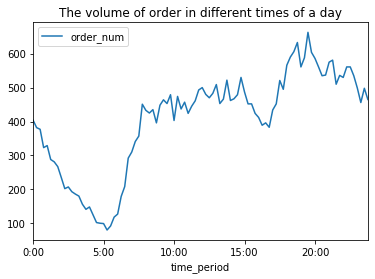

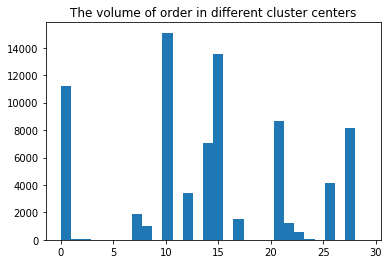

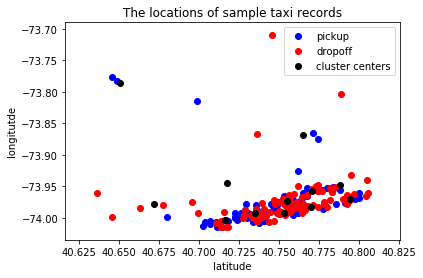

In [7]:
# Task 3 - Simple Data Visualization 
#
#
# Task 3.1 Using data obtained from Task 2.1. Plot a curve of the volume of order in different times of a day.
#                    Hint: try the API DataFrame.plot
import matplotlib.pyplot as plt
tcluster.set_index('time_period').plot()
plt.title('The volume of order in different times of a day')
plt.show()


# Task 3.2 Using data obtained from Task 2.2.1. Plot a histogram of the volume of order in different cluster centers
plt.hist(location_kmeans.labels_,bins=30)
plt.title('The volume of order in different cluster centers')
plt.show()


# Task 3.3 Scatter plot 100 random location of the pickups in blue, 100 random location of dropoffs in red, plot also the cluster centers in black. These data are randomly sampled from the data.
sample_space = taxi_data.index.to_list()
rpickup = np.random.choice(sample_space,100)    #random indexs of pickups
rdropoff = np.random.choice(sample_space,100)   #random indexs of dropoffs

spickup = taxi_data.loc[rpickup,('pickup_x','pickup_y')]     #random samples of pickups
sdropoff = taxi_data.loc[rdropoff,('dropoff_x','dropoff_y')] #random samples of dropoffs

# plot the dots
plt.plot(spickup['pickup_x'],spickup['pickup_y'],'bo',label='pickup')       #pickup
plt.plot(sdropoff['dropoff_x'],sdropoff['dropoff_y'],'ro',label='dropoff')   #dropoff
plt.plot(location_kmeans.cluster_centers_[:,0],location_kmeans.cluster_centers_[:,1],'ko',label='cluster centers') #cluster centers
# plot settings
xmax = max(spickup['pickup_x']) if max(spickup['pickup_x']) >= max(sdropoff['dropoff_x']) else max(sdropoff['dropoff_x'])
xmin = min(spickup['pickup_x']) if min(spickup['pickup_x']) <= min(sdropoff['dropoff_x']) else min(sdropoff['dropoff_x'])
ymax = max(spickup['pickup_y']) if max(spickup['pickup_y']) >= max(sdropoff['dropoff_y']) else max(sdropoff['dropoff_y'])
ymin = min(spickup['pickup_y']) if min(spickup['pickup_y']) <= min(sdropoff['dropoff_y']) else min(sdropoff['dropoff_y'])
eps = 0.02
plt.axis([xmin-eps,xmax+eps,ymin-eps,ymax+eps])
plt.title('The locations of sample taxi records')
plt.xlabel('latitude')
plt.ylabel('longitutde')
plt.legend()
plt.show()


In [8]:
# Task 4 - Frequent Pattern Mining 
#
#
# Waiting for the specific requirements. 

### Task 5 - Prediction

You are given another set of Taxi data while this time there are more columns to play with. With these data you are going to help a Taxi driver, Daniel, to optimize his profit. 

![](http://file1.telestar.fr/var/telestar/storage/images/3/0/9/9/3099879/samy-naceri-dans-taxi-2_width1024.jpg)  - From the movie *Taxi* - src: telestar.fr



In [ ]:
df = pd.read_csv('./training.csv', sep=',', nrows=10)
df.head(10)

## Task 5.1: 
It is Monday 8am, the prime time for every Taxi Driver. Daniel have received three orders at the same time. Assume Daniel are equally far from these three orders. Please help Daniel to pick the one with largest income (fare + tips). The fields `fare`, `tips` and `best` are masked in testing.

In [11]:
monday8am = pd.read_csv('./data/5_1_testing.csv', sep=',', nrows=10, index_col=0)
monday8am.head(10)

order1_pickup_longitude  order2_pickup_latitude  \
order1_pickup_latitude                                                    
175.0                                     675.0                   660.0   
686.0                                     500.0                    37.0   
173.0                                     203.0                   779.0   
660.0                                     120.0                   419.0   
167.0                                     754.0                   395.0   
660.0                                     120.0                   173.0   
556.0                                     288.0                   175.0   
64.0                                      231.0                   109.0   
173.0                                     203.0                    18.0   
767.0                                     733.0                   166.0   

                        order2_pickup_longitude  order3_pickup_latitude  \
order1_pickup_latitude                                                    
175.0                                     120.0                   130.0   
686.0                                     370.0                   688.0   
173.0                                      81.0                   744.0   
660.0                                     615.0                   175.0   
167.0                                     408.0                   744.0   
660.0                                     203.0                   173.0   
556.0                                     675.0                   618.0   
64.0                                      708.0                   754.0   
173.0                                     610.0                    18.0   
767.0                                     725.0                   225.0   

                        order3_pickup_longitude trip_start_timestamp  \
order1_pickup_latitude                                                 
175.0                                     532.0  2016-02-01 08:00:00   
686.0                                     206.0  2016-02-01 08:00:00   
173.0                                     605.0  2016-02-01 08:00:00   
660.0                                     675.0  2016-02-01 08:00:00   
167.0                                     605.0  2016-02-01 08:00:00   
660.0                                     203.0  2016-02-01 08:00:00   
556.0                                     407.0  2016-02-01 08:00:00   
64.0                                      410.0  2016-02-01 08:00:00   
173.0                                     610.0  2016-02-01 08:00:00   
767.0                                       6.0  2016-02-01 08:00:00   

                        order1_fare  order1_tips  order2_fare  order2_tips  \
order1_pickup_latitude                                                       
175.0                             0            0            0            0   
686.0                             0            0            0            0   
173.0                             0            0            0            0   
660.0                             0            0            0            0   
167.0                             0            0            0            0   
660.0                             0            0            0            0   
556.0                             0            0            0            0   
64.0                              0            0            0            0   
173.0                             0            0            0            0   
767.0                             0            0            0            0   

                        order3_fare  order3_tips  best  
order1_pickup_latitude                                  
175.0                             0            0     0  
686.0                             0            0     0  
173.0                             0            0     0  
660.0                             0            0     0  
167.0                             0            0     0  
660.0                

## Task 5.2:
It is Daniels holiday and he receives a call from his friend to ask him work as a substitute. His friend will pay him a few hundred to Daniel plus all the tips he earned during the period. Please help Daniel to optimize his profit by picking order. This time, Daniel are given three order at a time. These orders will have the location of the pick up and drop off, and the payment method of the order.  The fields `tips` and `best` are masked in testing.

In [13]:
best_tips = pd.read_csv('./data/5_2_testing.csv', sep=',', nrows=10)
best_tips.head(10)

trip_start_timestamp  order1_pickup_latitude  order1_pickup_longitude  \
0  2016-02-04 19:00:00                   686.0                    500.0   
1  2016-02-04 19:00:00                    18.0                    610.0   
2  2016-02-04 19:00:00                   527.0                     24.0   
3  2016-02-04 19:00:00                   419.0                    615.0   
4  2016-02-04 19:00:00                    18.0                    610.0   
5  2016-02-04 19:00:00                   173.0                    203.0   
6  2016-02-04 19:00:00                   167.0                    754.0   
7  2016-02-04 19:00:00                    18.0                    610.0   
8  2016-02-04 19:00:00                    18.0                    610.0   
9  2016-02-04 19:00:00                   158.0                    270.0   

   order2_pickup_latitude  order2_pickup_longitude  order3_pickup_latitude  \
0                   395.0                    408.0                   225.0   
1                   728.0                    277.0                   210.0   
2                    18.0                    610.0                   744.0   
3                   411.0                    545.0                   411.0   
4                   688.0                    206.0                   660.0   
5                   754.0                    410.0                    18.0   
6                   294.0                    113.0                   161.0   
7                   754.0                    410.0                    18.0   
8                   225.0                      6.0                   130.0   
9                   419.0                    615.0                    45.0   

   order3_pickup_longitude  order1_dropoff_latitude  order1_dropoff_longitude  \
0                      6.0                    173.0                     203.0   
1                    470.0                    294.0                     113.0   
2                    605.0                    527.0                      24.0   
3                    545.0                    225.0                       6.0   
4                    120.0                    355.0                     333.0   
5                    610.0                    109.0                     708.0   
6                    649.0                    744.0                     605.0   
7                    610.0                     18.0                     610.0   
8                    532.0                    294.0                     113.0   
9                    163.0                    604.0                     668.0   

   order2_dropoff_latitude  ...  order1_fare  order1_tips  \
0                    564.0  ...        10.25            0   
1                    728.0  ...        10.25            0   
2                    411.0  ...         3.25            0   
3                    754.0  ...        40.50            0   
4                    454.0  ...        19.50            0   
5                    695.0  ...        11.25            0   
6                    210.0  ...         6.00            0   
7                    744.0  ...         6.75            0   
8                      NaN  ...         6.75            0   
9                    754.0  ...        19.25            0   

   order1_payment_type  order2_fare  order2_tips order2_payment_type  \
0          Credit Card        15.00            0                Cash   
1          Credit Card         4.50            0         Credit Card   
2                 Cash         4.25            0                Cash   
3                 Cash         9.00            0                Cash   
4                 Cash         7.75            0                Cash   
5                 Cash         6.25            0         Credit Card   
6                 Cash         4.50            0                Cash   
7                 Cash         7.25            0         Credit Card   
8                 Cash        42.00            0         Credit Card   
9          Credit Card         5.

With the data given above, predict which order will give you the best result. The accurarcy of your prediction for 5.1 and 5.2 are measured by:
 * `total_numbers_of_correct_prediction` / `number_of_rows_of_test` * 100%.  
An empty prediction would be counted as one wrong prediction. 


* **A higher accuracy does not immediate imply a higher mark for the project. We value more on how you choose your algorithm , how you fine tune your parameters, and explain why your algorithm did/did not work.**


## Part 2 - Group Presentation

Prepare a 5 minutes presentation on your Task 5 prediction work. You will be given the ground truth after the due day. Compute the accuracy yourself and include it in your presentation. Your presentation should be focus on why would your choose that particular algorithm and what optimization/fine tuning you have done to improve the accuracy. You can also comment on your accuracy and suggest how could that be improved. 

You may use the following line to measure the accurarcy
```
groundtruth['predict'] = output['predict']
groundtruth[ groundtruth['best'] == groundtruth['predict']].count()
```

Since this is a short presentation, you may assign any member to present the work.

**Note: Again, a higher accuracy does not immediate imply a higher mark.**